In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

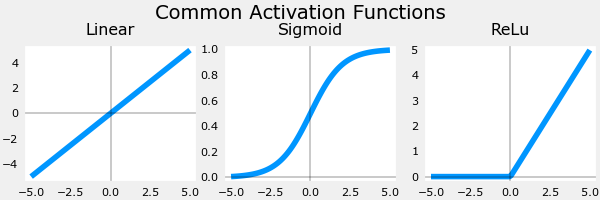

In [36]:
plt_act_trio()

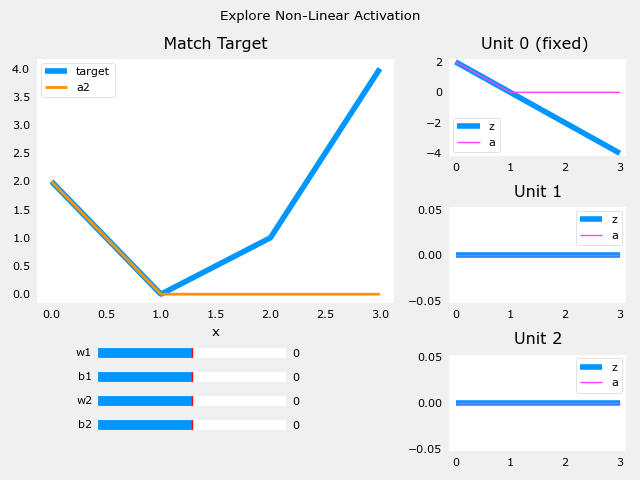

In [37]:
_ = plt_relu_ex()

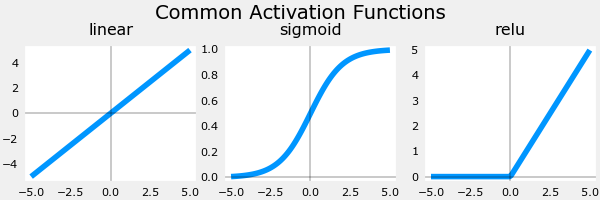

In [38]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

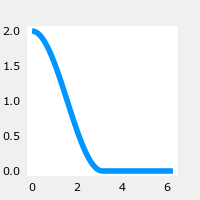

In [39]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [40]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation = "linear", input_shape = (1,), weights=[w10,b10])
z10 = d10(X.reshape(-1,1))
a10 = relu(z10)

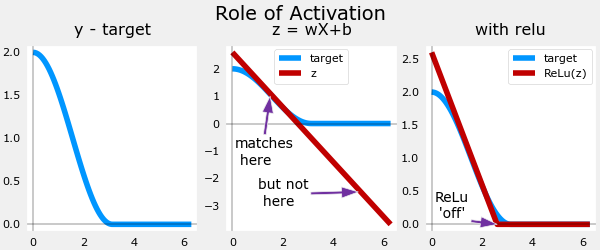

In [41]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

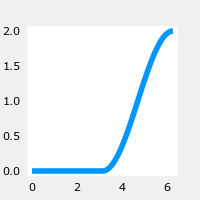

In [42]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot:title={'center':'y - target'}>,
       <AxesSubplot:title={'center':'z = wX+b'}>,
       <AxesSubplot:title={'center':'with relu'}>], dtype=object)

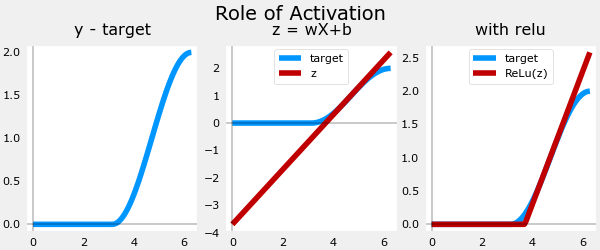

In [43]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

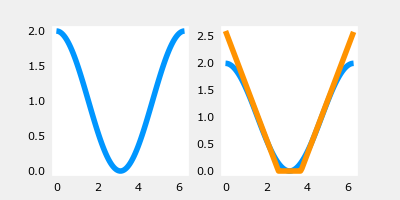

In [44]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

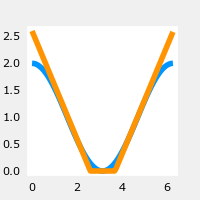

In [45]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

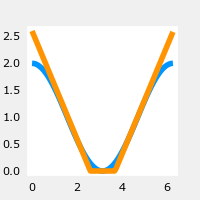

In [46]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [47]:
model = Sequential(
    [ 
        d10,
        tf.keras.layers.Activation(tf.keras.activations.relu),
        d11,
        tf.keras.layers.Activation(tf.keras.activations.relu),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

model.fit(
    X,y,
    epochs=1000
)

Epoch 1/1000
4/4 [==============================] - 0s 671us/step - loss: 1.3154
Epoch 2/1000
4/4 [==============================] - 0s 976us/step - loss: 0.7685
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5300
Epoch 4/1000
4/4 [==============================] - 0s 987us/step - loss: 0.5160
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5500
Epoch 6/1000
4/4 [==============================] - 0s 995us/step - loss: 0.5683
Epoch 7/1000
4/4 [==============================] - 0s 995us/step - loss: 0.5568
Epoch 8/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5266
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5095
Epoch 10/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5082
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 12/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5255
Epoch 13/1000
4/4 [==============

4/4 [==============================] - 0s 1ms/step - loss: 0.5140
Epoch 103/1000
4/4 [==============================] - 0s 653us/step - loss: 0.5169
Epoch 104/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5061
Epoch 105/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5050
Epoch 106/1000
4/4 [==============================] - 0s 810us/step - loss: 0.5050
Epoch 107/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5076
Epoch 108/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5082
Epoch 109/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5074
Epoch 110/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5183
Epoch 111/1000
4/4 [==============================] - 0s 777us/step - loss: 0.5184
Epoch 112/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5109
Epoch 113/1000
4/4 [==============================] - 0s 665us/step - loss: 0.5102
Epoch 114/1000
4/4 [===

4/4 [==============================] - 0s 828us/step - loss: 0.5060
Epoch 301/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5157
Epoch 302/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5193
Epoch 303/1000
4/4 [==============================] - 0s 735us/step - loss: 0.5084
Epoch 304/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5062
Epoch 305/1000
4/4 [==============================] - 0s 672us/step - loss: 0.5216
Epoch 306/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5262
Epoch 307/1000
4/4 [==============================] - 0s 835us/step - loss: 0.5149
Epoch 308/1000
4/4 [==============================] - 0s 977us/step - loss: 0.5128
Epoch 309/1000
4/4 [==============================] - 0s 660us/step - loss: 0.5057
Epoch 310/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5054
Epoch 311/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5063
Epoch 312/1000
4/4 [=

4/4 [==============================] - 0s 651us/step - loss: 0.5057
Epoch 400/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5047
Epoch 401/1000
4/4 [==============================] - 0s 661us/step - loss: 0.5049
Epoch 402/1000
4/4 [==============================] - 0s 975us/step - loss: 0.5074
Epoch 403/1000
4/4 [==============================] - 0s 673us/step - loss: 0.5096
Epoch 404/1000
4/4 [==============================] - 0s 504us/step - loss: 0.5048
Epoch 405/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5102
Epoch 406/1000
4/4 [==============================] - 0s 978us/step - loss: 0.5152
Epoch 407/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5107
Epoch 408/1000
4/4 [==============================] - 0s 789us/step - loss: 0.5082
Epoch 409/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5048
Epoch 410/1000
4/4 [==============================] - 0s 849us/step - loss: 0.5080
Epoch 411/1000
4/4 

4/4 [==============================] - 0s 659us/step - loss: 0.5324
Epoch 598/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5152
Epoch 599/1000
4/4 [==============================] - 0s 673us/step - loss: 0.5070
Epoch 600/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5189
Epoch 601/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5256
Epoch 602/1000
4/4 [==============================] - 0s 652us/step - loss: 0.5153
Epoch 603/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5082
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5138
Epoch 605/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5087
Epoch 606/1000
4/4 [==============================] - 0s 999us/step - loss: 0.5054
Epoch 607/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5049
Epoch 608/1000
4/4 [==============================] - 0s 661us/step - loss: 0.5046
Epoch 609/1000
4/4 [=

4/4 [==============================] - 0s 977us/step - loss: 0.5138
Epoch 697/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5145
Epoch 698/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5064
Epoch 699/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5048
Epoch 700/1000
4/4 [==============================] - 0s 769us/step - loss: 0.5052
Epoch 701/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5051
Epoch 702/1000
4/4 [==============================] - 0s 660us/step - loss: 0.5132
Epoch 703/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5056
Epoch 704/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5057
Epoch 705/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5064
Epoch 706/1000
4/4 [==============================] - 0s 836us/step - loss: 0.5099
Epoch 707/1000
4/4 [==============================] - 0s 335us/step - loss: 0.5115
Epoch 708/1000
4/4 [===

4/4 [==============================] - 0s 651us/step - loss: 0.5086
Epoch 796/1000
4/4 [==============================] - 0s 663us/step - loss: 0.5060
Epoch 797/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5054
Epoch 798/1000
4/4 [==============================] - 0s 660us/step - loss: 0.5055
Epoch 799/1000
4/4 [==============================] - 0s 977us/step - loss: 0.5064
Epoch 800/1000
4/4 [==============================] - 0s 986us/step - loss: 0.5055
Epoch 801/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5060
Epoch 802/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5053
Epoch 803/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5055
Epoch 804/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5102
Epoch 805/1000
4/4 [==============================] - 0s 827us/step - loss: 0.5084
Epoch 806/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5065
Epoch 807/1000
4/4 [=

4/4 [==============================] - 0s 845us/step - loss: 0.5090
Epoch 895/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5222
Epoch 896/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5146
Epoch 897/1000
4/4 [==============================] - 0s 990us/step - loss: 0.5044
Epoch 898/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5072
Epoch 899/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5166
Epoch 900/1000
4/4 [==============================] - 0s 650us/step - loss: 0.5186
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5110
Epoch 902/1000
4/4 [==============================] - 0s 661us/step - loss: 0.5083
Epoch 903/1000
4/4 [==============================] - 0s 326us/step - loss: 0.5125
Epoch 904/1000
4/4 [==============================] - 0s 652us/step - loss: 0.5068
Epoch 905/1000
4/4 [==============================] - 0s 976us/step - loss: 0.5208
Epoch 906/1000
4/4 [===

In [48]:
model = Sequential(
    [ 
        Dense(1,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 0s 984us/step - loss: 1.5047
Epoch 2/10
4/4 [==============================] - 0s 1ms/step - loss: 1.4262
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 1.3524
Epoch 4/10
4/4 [==============================] - 0s 651us/step - loss: 1.2815
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 1.2154
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 1.1530
Epoch 7/10
4/4 [==============================] - 0s 765us/step - loss: 1.0937
Epoch 8/10
4/4 [==============================] - 0s 976us/step - loss: 1.0434
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 0.9906
Epoch 10/10
4/4 [==============================] - 0s 976us/step - loss: 0.9458


In [49]:
yhat = model.predict(X)
yhat[0:5]

array([[0.37],
       [0.37],
       [0.37],
       [0.37],
       [0.37]], dtype=float32)

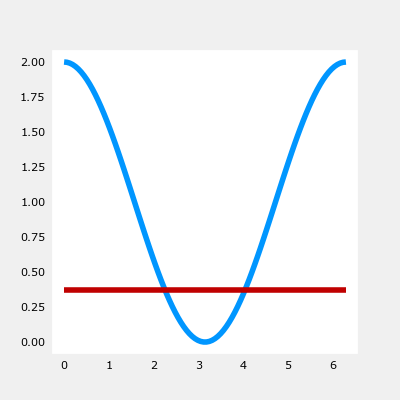

In [50]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [51]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [52]:
l1.get_weights()

[array([[-1.3]], dtype=float32), array([0.], dtype=float32)]

In [53]:
l2.get_weights()

[array([[0.44]], dtype=float32), array([0.37], dtype=float32)]

In [54]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 998us/step - loss: 1.2334
Epoch 2/100
4/4 [==============================] - 0s 977us/step - loss: 1.1364
Epoch 3/100
4/4 [==============================] - 0s 832us/step - loss: 1.0225
Epoch 4/100
4/4 [==============================] - 0s 650us/step - loss: 0.9141
Epoch 5/100
4/4 [==============================] - 0s 976us/step - loss: 0.8106
Epoch 6/100
4/4 [==============================] - 0s 750us/step - loss: 0.7093
Epoch 7/100
4/4 [==============================] - 0s 976us/step - loss: 0.6211
Epoch 8/100
4/4 [==============================] - 0s 680us/step - loss: 0.5587
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5202
Epoch 10/100
4/4 [==============================] - 0s 711us/step - loss: 0.5088
Epoch 11/100
4/4 [==============================] - 0s 976us/step - loss: 0.5021
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4888
Epoch 13/100
4/4 [=======================

In [55]:
l2.set_weights([w2,b2])

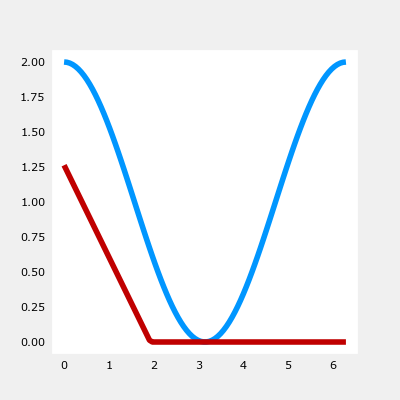

In [56]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)

In [58]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')

<AxesSubplot:title={'center':'Multiclass Data'}, xlabel='x0', ylabel='x1'>

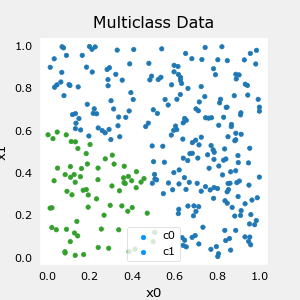

In [59]:
X = np.random.rand(300, 2)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [60]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=150
)

Epoch 1/150
10/10 [==============================] - 0s 719us/step - loss: 0.2444
Epoch 2/150
10/10 [==============================] - 0s 937us/step - loss: 0.2325
Epoch 3/150
10/10 [==============================] - 0s 871us/step - loss: 0.2223
Epoch 4/150
10/10 [==============================] - 0s 806us/step - loss: 0.2139
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2058
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2005
Epoch 7/150
10/10 [==============================] - 0s 771us/step - loss: 0.1958
Epoch 8/150
10/10 [==============================] - 0s 980us/step - loss: 0.1925
Epoch 9/150
10/10 [==============================] - 0s 651us/step - loss: 0.1896
Epoch 10/150
10/10 [==============================] - 0s 980us/step - loss: 0.1873
Epoch 11/150
10/10 [==============================] - 0s 721us/step - loss: 0.1856
Epoch 12/150
10/10 [==============================] - 0s 949us/step - loss: 0.1843
Epoch 13/150
10/1

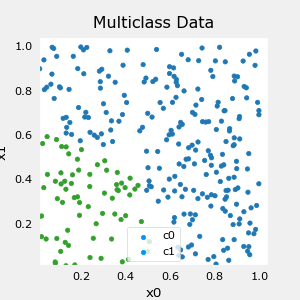

In [61]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [62]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

[[-1.24 -0.84]
 [-0.02 -1.  ]] [-0.06  0.  ]
[[0.35]
 [1.19]] [-1.19]


In [63]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

array([-2.5])

(500, 2) MiniBatchKMeans(n_clusters=3)
(500, 2) AffinityPropagation(damping=0.9, preference=-200, random_state=0)
(500, 2) MeanShift(bandwidth=1.321267758400405, bin_seeding=True)
(500, 2) SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)
(500, 2) AgglomerativeClustering(connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)
(500, 2) AgglomerativeClustering(affinity='cityblock',
                        connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=3)
(500, 2) DBSCAN(eps=0.3)
(500, 2) OPTICS(min_cluster_size=0.1, min_samples=7)
(500, 2) Birch()
(500, 2) GaussianMixture(n_components=3)


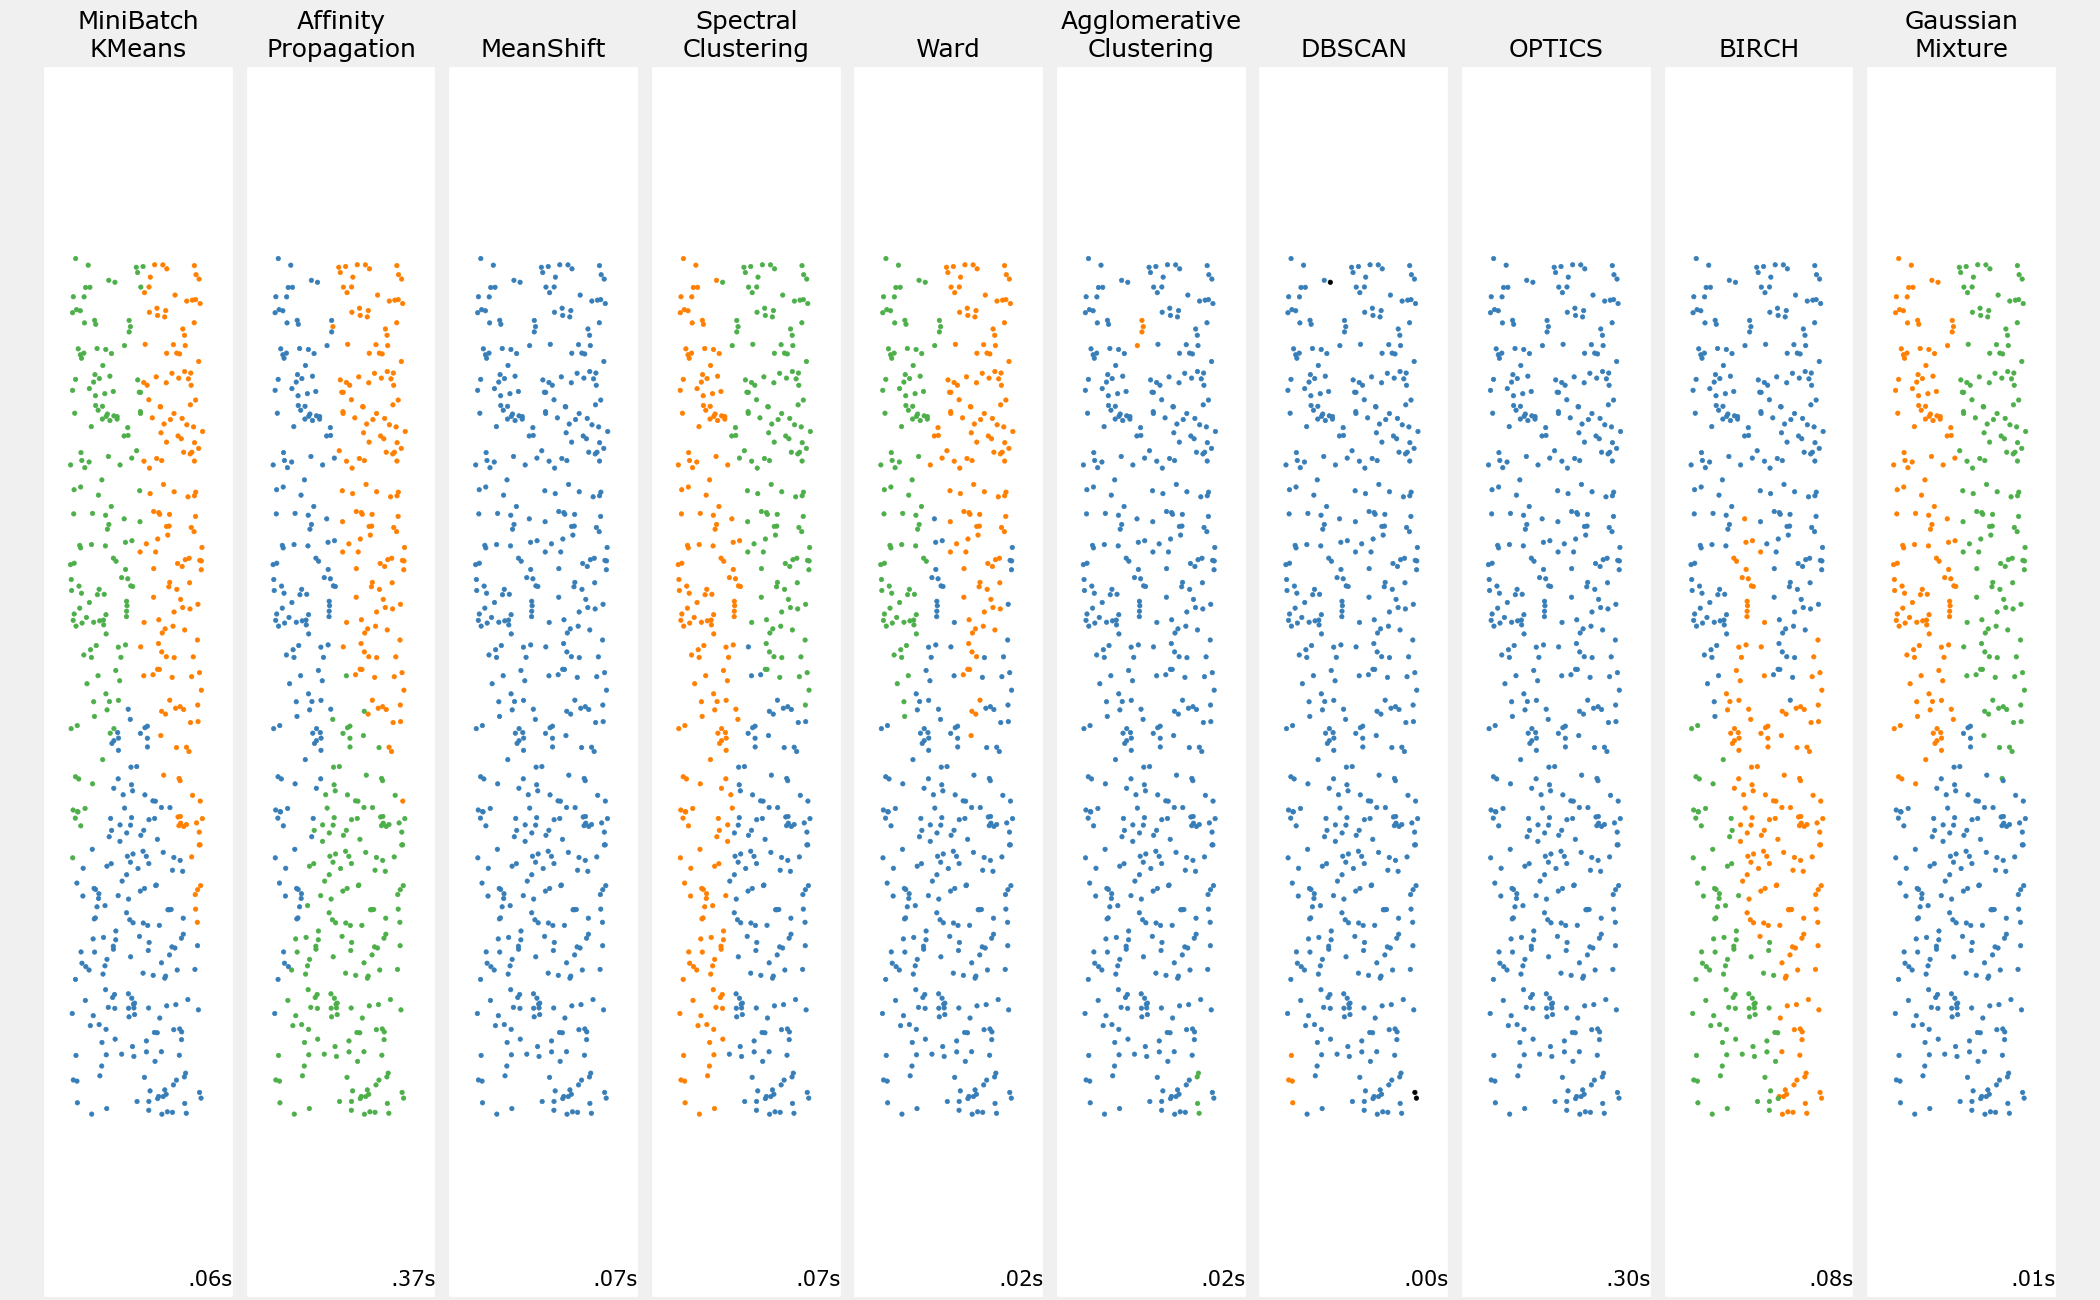

In [64]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

datasets = [
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            print(X.shape,algorithm)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()